##  csv فراخوانی فایل 

In [4]:
import pandas as pd
data=pd.read_csv('Employee.csv')
data.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
data.drop(columns=['Education','City','Gender','EverBenched'],inplace=True)
data.corr()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


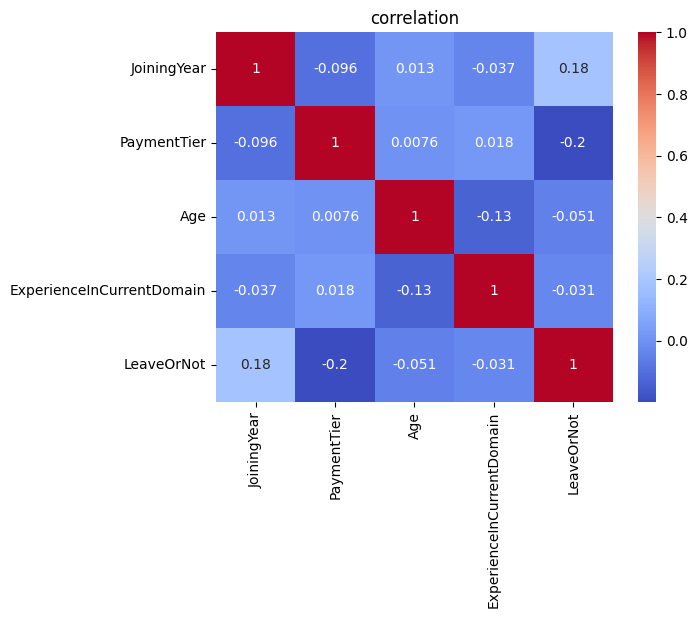

In [10]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',)
plt.title('correlation')
plt.show()

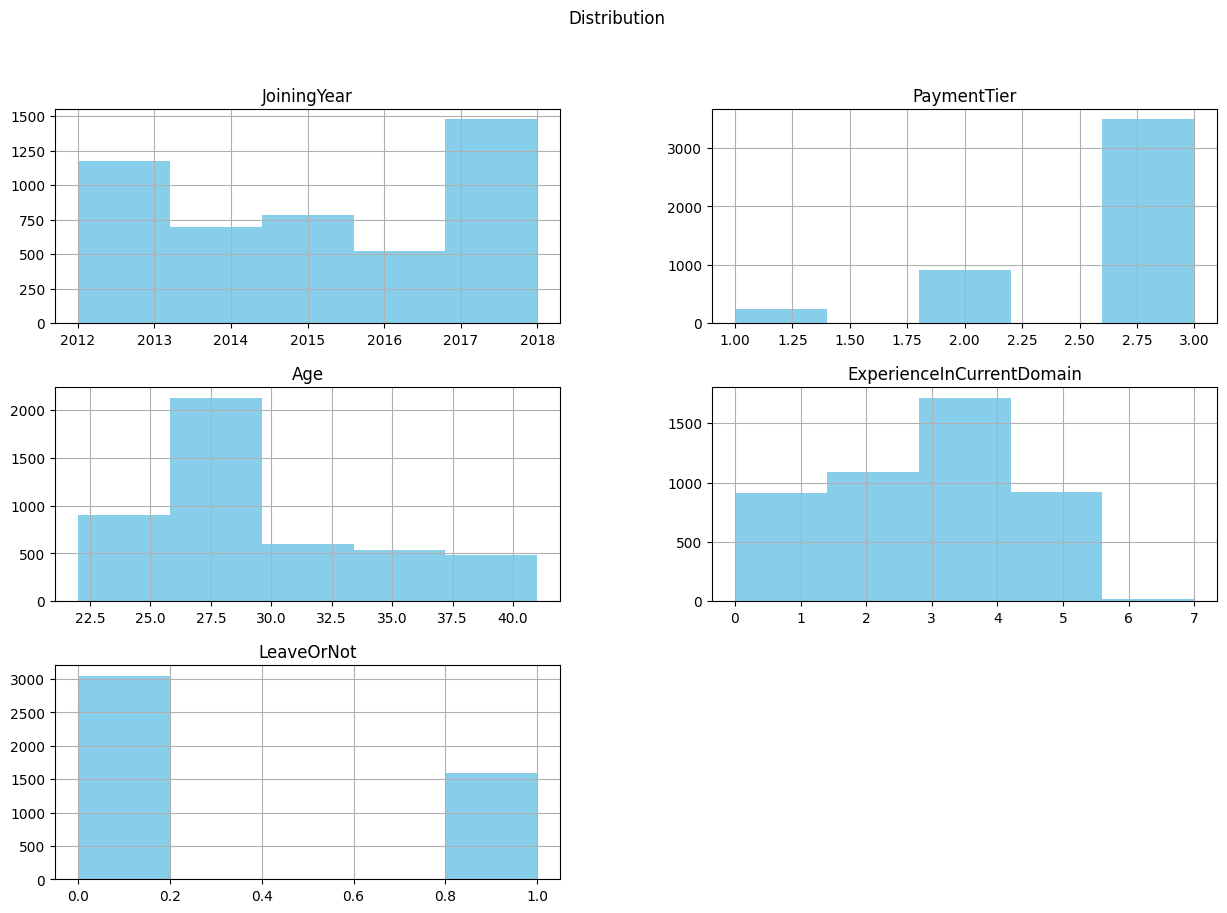

In [11]:
data.hist(bins=5,figsize=(15,10),color='skyblue')
plt.suptitle('Distribution')
plt.show()

In [13]:
data.isnull().sum()

JoiningYear                  0
PaymentTier                  0
Age                          0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

## cleaning+preprocessing

In [25]:
columns=[col for col in data.columns if col!='LeaveOrNot']
for col in columns:
  data[col]=data[col].fillna(data[col].mean())

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=['Education','City','Gender','EverBenched']
for col in columns:
    data[col]=le.fit_transform(data[col])
data    


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


## split data

In [37]:
from sklearn.model_selection import train_test_split
X=data.drop(columns='LeaveOrNot')
y=data['LeaveOrNot']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=48)
X_test

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
2619,0,2015,0,3,30,1,0,4
4420,1,2017,1,2,36,0,0,3
3423,1,2015,1,3,32,1,0,0
2017,0,2012,0,3,26,1,0,4
1084,0,2013,0,3,25,1,0,3
...,...,...,...,...,...,...,...,...
3509,1,2013,0,3,37,0,0,3
1613,0,2014,0,3,25,1,0,3
4367,0,2018,2,2,34,0,0,4
2945,0,2012,2,2,27,0,0,5


## standardization

In [38]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [39]:
X_train

array([[1.        , 0.16666667, 0.        , ..., 1.        , 0.        ,
        0.57142857],
       [0.        , 0.66666667, 0.        , ..., 1.        , 0.        ,
        0.42857143],
       [0.5       , 0.83333333, 0.5       , ..., 0.        , 0.        ,
        0.28571429],
       ...,
       [0.        , 0.83333333, 1.        , ..., 0.        , 0.        ,
        0.14285714],
       [0.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.71428571],
       [0.        , 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.14285714]], shape=(3722, 8))

## logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression(max_iter=1000,random_state=48)
model.fit(X_train,y_train) 
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
acc

0.7003222341568206

## SVM

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model=SVC(random_state=48)
model.fit(X_train,y_train) 
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
acc

0.8238453276047261